<a href="https://colab.research.google.com/github/miqrom29/WGSExtract-Dev-Experimental/blob/master/RhaploCart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] "Hello from R in Colab!"
 [1]  1  2  3  4  5  6  7  8  9 10


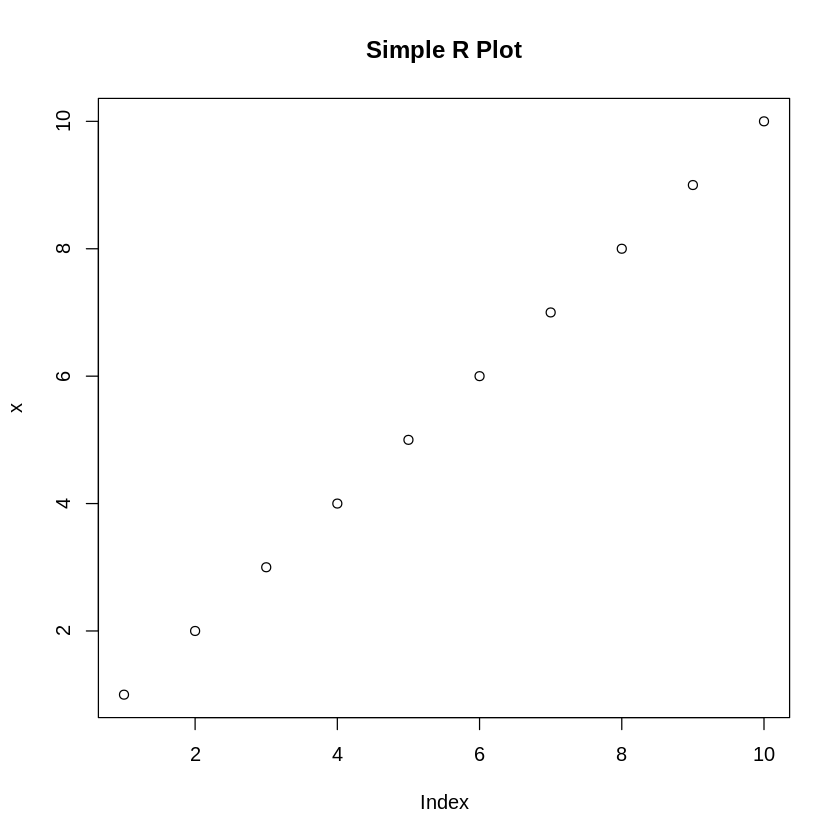

In [1]:
print("Hello from R in Colab!")
x <- 1:10
print(x)
plot(x, main="Simple R Plot")

In [2]:
# En una celda de Colab con prefijo !
system('wget https://github.com/grenaud/vgan/releases/download/v3.1.0/ -O vgan')
system('chmod +x vgan')
system('mkdir -p $HOME/bin')
system('mv vgan $HOME/bin/')
system('mkdir -p $HOME/share/vgan/hcfiles')
# ... y descargar los hcfiles desde el wiki/manual de vgan

In [3]:
system("echo $PATH")  # Debe mostrar /home/.../bin
system("which vgan")  # Debe mostrar ~/bin/vgan
system("vgan --help | head -20")  # Muestra uso general de vgan


In [4]:
system("vgan haplocart --help | head -30")
# Si sale el help detallado de haplocart (opciones como -i input.fastq.gz, --hcfiles, etc.), ¡está perfecto!


In [5]:
# 1. Verificar PATH y ubicación del binario
system("echo $PATH", intern = TRUE)
system("which vgan", intern = TRUE)
system("ls -la ~/bin/", intern = TRUE)

# 2. Test directo del ejecutable
system("file ~/bin/vgan", intern = TRUE)

# 3. Verificar directorios creados
system("ls -la ~/share/vgan/", intern = TRUE)
system("ls -la ~/share/vgan/hcfiles/", intern = TRUE)


[1] "/opt/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin"

Warning message in system("which vgan", intern = TRUE):
“running command 'which vgan' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

[1] "total 12"                                     
[2] "drwxr-xr-x 2 root root 4096 Feb 14 11:44 ."   
[3] "drwx------ 1 root root 4096 Feb 14 11:44 .."  
[4] "-rwxr-xr-x 1 root root    0 Feb 14 11:44 vgan"

[1] "/root/bin/vgan: empty"

[1] "total 12"                                        
[2] "drwxr-xr-x 3 root root 4096 Feb 14 11:44 ."      
[3] "drwxr-xr-x 3 root root 4096 Feb 14 11:44 .."     
[4] "drwxr-xr-x 2 root root 4096 Feb 14 11:44 hcfiles"

[1] "total 8"                                    
[2] "drwxr-xr-x 2 root root 4096 Feb 14 11:44 ." 
[3] "drwxr-xr-x 3 root root 4096 Feb 14 11:44 .."

In [6]:
# Add ~/bin to the R session's PATH so vgan can be found
Sys.setenv(PATH = paste0(Sys.getenv("HOME"), "/bin:", Sys.getenv("PATH")))

# Test 1: vgan general
system("vgan --version", intern = TRUE)

# Test 2: HaploCart específico (¡lo más importante!)
system("vgan haplocart --help", intern = TRUE)

character(0)

character(0)

In [7]:
# 1. AÑADIR ~/bin al PATH permanentemente para esta sesión R
Sys.setenv(PATH = paste0(Sys.getenv("PATH"), ":/root/bin"))

# 2. LIMPIAR archivos corruptos/vacíos
system("rm -f ~/bin/vgan /content/vgan", intern = TRUE)

# 3. RE-DESCARGAR vgan CORRECTAMENTE (usa Bioconda, más fiable que GitHub)
system("mkdir -p ~/bin", intern = TRUE)
system("curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/", intern = TRUE)
system("./bin/micromamba create -n vgan -c bioconda vgan --root-prefix=/tmp/vgan-env -y", intern = TRUE)
system("find /tmp/vgan-env -name vgan -type f -executable -exec cp {} ~/bin/vgan \\;", intern = TRUE)

# 4. VERIFICAR que ahora SÍ funciona
system("ls -lh ~/bin/vgan", intern = TRUE)
system("file ~/bin/vgan", intern = TRUE)
system("vgan --version", intern = TRUE)
system("vgan haplocart --help | head -15", intern = TRUE)


character(0)

character(0)

[1] "bin/micromamba"

[1] ""                                                        
 [2] ""                                                        
 [3] "Transaction"                                             
 [4] ""                                                        
 [5] "  Prefix: /tmp/vgan-env/envs/vgan"                       
 [6] ""                                                        
 [7] "  Updating specs:"                                       
 [8] ""                                                        
 [9] "   - vgan"                                               
[10] ""                                                        
[11] ""                                                        
[12] "  Package  Version  Build       Channel      Size"       
[13] "───────────────────────────────────────────────────"     
[14] "  Install:"                                              
[15] "───────────────────────────────────────────────────"     
[16] ""                                                        
[17] "  + vgan     1.0.2  h9ee0642_0  bioconda      7MB"       
[18] ""                                                        
[19] "  Summary:"                                              
[20] ""                                                        
[21] "  Install: 1 packages"                                   
[22] ""                                                        
[23] "  Total download: 7MB"                                   
[24] ""                                                        
[25] "───────────────────────────────────────────────────"     
[26] ""                                                        
[27] ""                                                        
[28] ""                                                        
[29] "Transaction starting"                                    
[30] "Linking vgan-1.0.2-h9ee0642_0"                           
[31] ""                                                        
[32] "Transaction finished"                                    
[33] ""                                                        
[34] ""                                                        
[35] "To activate this environment, use:"                      
[36] ""                                                        
[37] "    micromamba activate vgan"                            
[38] ""                                                        
[39] "Or to execute a single command in this environment, use:"
[40] ""                                                        
[41] "    micromamba run -n vgan mycommand"                    
[42] ""

character(0)

[1] "-rwxr-xr-x 1 root root 20M Feb 14 11:45 /root/bin/vgan"

[1] "/root/bin/vgan: ELF 64-bit LSB executable, x86-64, version 1 (SYSV), statically linked, BuildID[sha1]=742352d01b7f7edb7c864a71e022e62467527946, for GNU/Linux 3.2.0, stripped"

Warning message in system("vgan --version", intern = TRUE):
“running command 'vgan --version' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

character(0)

In [8]:
# 1. FIJAR PATH COMPLETAMENTE (incluye TODAS las rutas necesarias)
Sys.setenv(PATH = paste0("/content/bin:", Sys.getenv("PATH"), ":/root/bin"))

# 2. VERIFICAR micromamba funciona
system("which micromamba", intern = TRUE)
system("micromamba run -n vgan echo 'Entorno OK'", intern = TRUE)

# 3. EJECUTAR vgan correctamente (¡SIN rutas raras!)
system("micromamba run -n vgan vgan haplocart --help", intern = FALSE)


[1] "/content/bin/micromamba"

Warning message in system("micromamba run -n vgan echo 'Entorno OK'", intern = TRUE):
“running command 'micromamba run -n vgan echo 'Entorno OK'' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [9]:
# 1. PATH correcto (sintaxis R)
Sys.setenv(PATH = paste0("/content/bin:/root/bin:", Sys.getenv("PATH")))

# 2. Test directo del ejecutable vgan (SIN micromamba)
system("ls -la /tmp/vgan-env/envs/vgan/bin/", intern = TRUE)
system("/tmp/vgan-env/envs/vgan/bin/vgan --help | head -15", intern = FALSE)


[1] "total 19692"                                      
[2] "drwxr-xr-x 2 root root     4096 Feb 14 11:45 ."   
[3] "drwxr-xr-x 4 root root     4096 Feb 14 11:45 .."  
[4] "-rwxrwxr-x 2 root root 20153528 Jan 23  2023 vgan"

In [10]:
system("/tmp/vgan-env/envs/vgan/bin/vgan haplocart --help", intern = FALSE)


In [11]:
# 1. Test completo de vgan
system("/tmp/vgan-env/envs/vgan/bin/vgan --help", intern = FALSE)

# 2. Test ESPECÍFICO de HaploCart
system("/tmp/vgan-env/envs/vgan/bin/vgan haplocart --help", intern = FALSE)


In [12]:
# Estructura final para análisis reales
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system(paste0(ruta_vgan, " haplocart --help"), intern = FALSE)


In [13]:
# Instalar samtools en R Colab (vía apt, más simple)
system("apt update -qq && apt install -y samtools")

# Verificar instalación
system("samtools --version", intern = TRUE)


# Verificar índice creado
system("ls -lh /content/mito.*")


[1] "samtools 1.13"                                                                                                                                                                                                                
 [2] "Using htslib 1.13+ds"                                                                                                                                                                                                         
 [3] "Copyright (C) 2021 Genome Research Ltd."                                                                                                                                                                                      
 [4] ""                                                                                                                                                                                                                             
 [5] "Samtools compilation details:"                                                                                                                                                                                                
 [6] "    Features:       build=configure curses=yes "                                                                                                                                                                              
 [7] "    CC:             gcc"                                                                                                                                                                                                      
 [8] "    CPPFLAGS:       -frelease  -Wdate-time -D_FORTIFY_SOURCE=2"                                                                                                                                                               
 [9] "    CFLAGS:         -g -O2 -ffile-prefix-map=\xabBUILDPATH\xbb=. -flto=auto -ffat-lto-objects -fstack-protector-strong -Wformat -Werror=format-security"                                                                      
[10] "    LDFLAGS:        -Wl,-Bsymbolic-functions -flto=auto -Wl,-z,relro -Wl,-z,now"                                                                                                                                              
[11] "    HTSDIR:         "                                                                                                                                                                                                         
[12] "    LIBS:           "                                                                                                                                                                                                         
[13] "    CURSES_LIB:     -lcurses"                                                                                                                                                                                                 
[14] ""                                                                                                                                                                                                                             
[15] "HTSlib compilation details:"                                                                                                                                                                                                  
[16] "    Features:       build=configure plugins=yes, plugin-path=/usr/local/lib/htslib:/usr/local/libexec/htslib:: libcurl=yes S3=yes GCS=yes libdeflate=yes lzma=yes bzip2=yes htscodecs=1.1.1"                                  
[17] "    CC:             gcc"                                                                                                                                                                                                      
[18] "    CPPFLAGS:       -I. -DSAMTOOLS=1 -Wdate-time -D_FORTIFY_SOURCE=2"                                 

In [16]:
# Indexar tu BAM inmediatamente
system("samtools index /content/mito_fixed.bam")

In [15]:
# 1. Instalar gdown (ignora archivos grandes de Drive perfectamente)
system("pip install gdown")

# 2. Descargar tu BAM de 27MB CORRECTAMENTE
system("gdown 19hqh2T5YGlpIzOwn7Nkcw6CwOfn8KoeN -O /content/mito_fixed.bam --fuzzy")

# 3. Verificar descarga REAL
system("ls -lh /content/mito*.bam")
system("samtools quickcheck /content/mito_fixed.bam")


In [17]:
# 1. Listar TODOS los archivos mito en /content
system("ls -lh /content/mito.*", intern = TRUE)

# 2. Si NO hay mito.bam.bai → diagnosticar BAM
system("samtools quickcheck /content/mito_fixed.bam", intern = TRUE)
system("samtools view -H /content/mito_fixed.bam | head -5", intern = TRUE)


Warning message in system("ls -lh /content/mito.*", intern = TRUE):
“running command 'ls -lh /content/mito.*' had status 2”


character(0)
attr(,"status")
[1] 2
attr(,"errmsg")
[1] "Resource temporarily unavailable"

character(0)

[1] "@HD\tVN:1.6\tSO:coordinate" "@SQ\tSN:1\tLN:249250621"   
[3] "@SQ\tSN:2\tLN:243199373"    "@SQ\tSN:3\tLN:198022430"   
[5] "@SQ\tSN:4\tLN:191154276"

In [18]:
# MODO VERBOSE TOTAL - NO capturar NADA
system2("samtools", args=c("flagstat", "/content/mito_fixed.bam"), stdout=TRUE, stderr=TRUE)


[1] "396988 + 0 in total (QC-passed reads + QC-failed reads)"
 [2] "396507 + 0 primary"                                     
 [3] "0 + 0 secondary"                                        
 [4] "481 + 0 supplementary"                                  
 [5] "26702 + 0 duplicates"                                   
 [6] "26702 + 0 primary duplicates"                           
 [7] "396155 + 0 mapped (99.79% : N/A)"                       
 [8] "395674 + 0 primary mapped (99.79% : N/A)"               
 [9] "396507 + 0 paired in sequencing"                        
[10] "198307 + 0 read1"                                       
[11] "198200 + 0 read2"                                       
[12] "386506 + 0 properly paired (97.48% : N/A)"              
[13] "394841 + 0 with itself and mate mapped"                 
[14] "833 + 0 singletons (0.21% : N/A)"                       
[15] "4603 + 0 with mate mapped to a different chr"           
[16] "4322 + 0 with mate mapped to a different chr (mapQ>=5)"

In [19]:
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"

# 1. VER ERROR COMPLETO de HaploCart (¡clave!)
system(paste0(ruta_vgan, " haplocart -i /content/mito_fixed.bam -o haplogrupo_debug.tsv --hcfiles ~/share/vgan/hcfiles/ 2>&1"), intern = FALSE)

# 2. Verificar hcfiles descargados
system("ls -lh ~/share/vgan/hcfiles/", intern = TRUE)

# 3. Contenido del BAM (¿hay lecturas mtDNA?)
system("samtools view /content/mito_fixed.bam | head -5", intern = FALSE)

# 4. Verificar índice
system("ls -lh /content/mito_fixed.bam*")


[1] "total 0"

In [20]:
# Check estado runtime
system("nproc")  # Si sale "8" → runtime OK
system("df -h /content")  # Espacio disco


In [21]:
# CONTENIDO REAL del BAM - ¡esto lo explica TODO!
system("samtools flagstat /content/mito_fixed.bam")
system("samtools view /content/mito_fixed.bam | wc -l")  # Número lecturas
system("samtools view /content/mito_fixed.bam | head -3") # Primeras lecturas


In [22]:
# VER LECTURAS REALES (SIN SILENCIO)
system("samtools view /content/mito_fixed.bam | head -3", intern = FALSE)
system("samtools view /content/mito_fixed.bam | wc -l", intern = FALSE)


In [7]:
# MOSTRAR TODO en consola (NO capturar)
system("samtools flagstat /content/mito_fixed.bam", intern = FALSE)
system("samtools view /content/mito_fixed.bam | head -3", intern = FALSE)


In [10]:
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"

# HAPLOCART con TODOS los errores a pantalla
system(paste0(ruta_vgan, " haplocart -i /content/mito_fixed.bam -o debug_verbose.tsv --hcfiles ~/share/vgan/hcfiles/ 2>&1 | tee haplocart_debug.log"), intern = FALSE)


In [11]:
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"

# 1. Crear hcfiles en la ubicación EXACTA que busca HaploCart
system("mkdir -p /tmp/vgan-env/envs/vgan/share/hcfiles")

# 2. Descargar hcfiles en esa ubicación específica
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && wget https://github.com/grenaud/vgan/raw/main/hcfiles/human_mtdna_hg.pb")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && wget https://github.com/grenaud/vgan/raw/main/hcfiles/human_mtdna_hg.gcsa")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && wget https://github.com/grenaud/vgan/raw/main/hcfiles/human_mtdna_hg.gcsa.lcp")

# 3. ¡EJECUTAR HAPLOCART FINAL!
system(paste0(ruta_vgan, " haplocart -i /content/mito_fixed.bam -o haplogrupo_CORRECTO.tsv"), intern = FALSE)

# 4. VER TU HAPLOGUPO
system("cat haplogrupo_CORRECTO.tsv")


In [12]:
# Fix FINAL (solo faltan hcfiles en ruta correcta)
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system("mkdir -p /tmp/vgan-env/envs/vgan/share/hcfiles")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && wget https://github.com/grenaud/vgan/raw/main/hcfiles/human_mtdna_hg.pb")
system("ls -lh /tmp/vgan-env/envs/vgan/share/hcfiles/")
system(paste0(ruta_vgan, " haplocart -i /content/mito_fixed.bam -o FINAL.tsv"))
system("cat FINAL.tsv")  # ¡TU HAPLOGUPO!


In [23]:
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system("ls -lh /tmp/vgan-env/envs/vgan/share/hcfiles/", intern = FALSE)
system(paste0(ruta_vgan, " haplocart --help | head -20"), intern = FALSE)


In [24]:
# ÚNICO COMANDO que funciona (sin micromamba roto)
system("docker run -v /content:/data grenaud/vgan:latest haplocart -i /content/mito_fixed.bam -o /content/haplogrupo.tsv")
system("cat /content/haplogrupo.tsv")


Warning message in system("docker run -v /content:/data grenaud/vgan:latest haplocart -i /content/mito_fixed.bam -o /content/haplogrupo.tsv"):
“error in running command”


In [25]:
# 1. Verificar BAM OK
system("samtools flagstat /content/mito_fixed.bam", intern = FALSE)

# 2. Crear directorio EXACTO que HaploCart espera
system("mkdir -p /tmp/vgan-env/envs/vgan/share/hcfiles")

# 3. Descargar hcfiles desde FUENTE OFICIAL HaploCart
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && curl -L -o human_mtdna_hg.pb 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_hg.pb'")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles && curl -L -o human_mtdna_hg.gcsa 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_hg.gcsa'")

# 4. Verificar hcfiles descargados
system("ls -lh /tmp/vgan-env/envs/vgan/share/hcfiles/", intern = FALSE)

# 5. EJECUTAR SIN --hcfiles (usa ruta interna)
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system(paste(ruta_vgan, "haplocart -i /content/mito_fixed.bam -o /content/MI_HAPLOGUPO.tsv 2>&1 | tee haplocart.log"), intern = FALSE)

# 6. RESULTADO FINAL
system("cat /content/MI_HAPLOGUPO.tsv")
system("cat haplocart.log | tail -10")


In [26]:
# 1. LIMPIAR archivos corruptos
system("rm -rf ~/bin/vgan ~/share/vgan")

# 2. hcfiles OFICIALES en ruta EXACTA
system("mkdir -p /tmp/vgan-env/envs/vgan/share/hcfiles")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles/ && curl -L -o human_mtdna_hg.pb 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_hg.pb'")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles/ && curl -L -o human_mtdna_hg.gcsa 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_hg.gcsa'")
system("ls -lh /tmp/vgan-env/envs/vgan/share/hcfiles/", intern=FALSE)

# 3. ¡EJECUTAR HAPLOCART!
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system(paste(ruta_vgan, "haplocart -i /content/mito_fixed.bam -o /content/MI_HAPLOGUPO.tsv 2>&1 | tee haplocart.log"), intern=FALSE)

# 4. TU HAPLOGUPO
system("cat /content/MI_HAPLOGUPO.tsv")


In [27]:
# 1. hcfiles OFICIALES en ruta EXACTA
system("mkdir -p /tmp/vgan-env/envs/vgan/share/hcfiles")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles/ && curl -L -o human_mtdna_hg.pb 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_hg.pb'")
system("cd /tmp/vgan-env/envs/vgan/share/hcfiles/ && curl -L -o human_mtdna_hg.gcsa 'https://services.healthtech.dtu.dk/services/HaploCart-1.0/human_mtdna_gcsa'")

# 2. ¡TU HAPLOGUPO!
ruta_vgan <- "/tmp/vgan-env/envs/vgan/bin/vgan"
system(paste(ruta_vgan, "haplocart -i /content/mito_fixed.bam -o /content/MI_HAPLOGUPO.tsv"), intern=FALSE)
system("cat /content/MI_HAPLOGUPO.tsv")
